#AUTHOR : Jyotsna
##GRIP @ The Sparks Foundation (Data Science & Business Analytics)
##Technical TASK 1 :- Prediction using Supervised ML
###In this task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

#Importing Libraries


In [33]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

#Reading the data from online source

In [34]:
# Reading data from remote link
url = "http://bit.ly/w-data"

# df is a dataframe that will store all the data which will be imported  
df = pd.read_csv(url)
print('Data Import Successful')
print(df.shape)
df

Data Import Successful
(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [35]:
# Concise summary of the dataframe 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [36]:
# Statistical summary of data frame 'df'
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#Visualization of the given data

Plotting our data points on 2-D graph to eyeball our dataset to see if we can manually find any relationship between the data. 

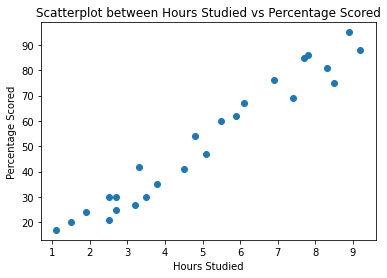

In [37]:
# Plotting the distribution of scores
plt.scatter(df.Hours,df.Scores)
plt.title('Scatterplot between Hours Studied vs Percentage Scored')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

Text(0, 0.5, 'Percentage Scored')

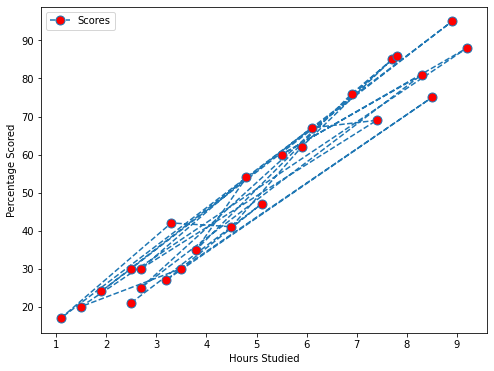

In [38]:
df.plot(x = 'Hours',y = 'Scores',linestyle = '--',marker = 'o',markersize = '9',markerfacecolor = 'red', figsize=(8,6))
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')

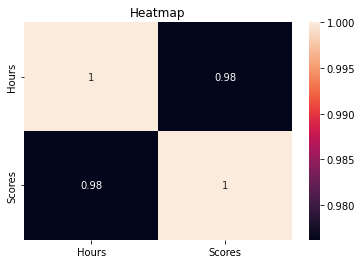

In [39]:
# Correlation plot - Heatmap
plt.title('Heatmap')
sns.heatmap(df.corr(), annot=True)
plt.show()

So from the plots we can safely assume a **positive linear relation** between the number of hours studied and percentage 0f score.



#Preparing the Data

Dividing the data into "attributes" (inputs) and "labels" (outputs)

In [40]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

# Spliting this data into training and test sets

Here, we split the data to train and test our model.

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 0)

#Training the Model

In [42]:
from sklearn.linear_model import LinearRegression

# regr is the linear regression object
regr = LinearRegression()
regr.fit(x_train, y_train) 

print('Training Complete.')

Training Complete.


# Ploting the Line Of Regression

Since the model is trained now, we'll plot the line of regression

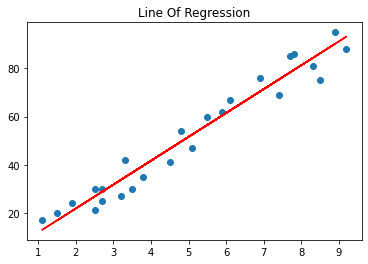

In [43]:
# Plotting the regression line
line = regr.coef_ * x + regr.intercept_

# Plotting for Test Data
plt.title('Line Of Regression')
plt.scatter(x, y)
plt.plot (x, line, color = 'Red')
plt.show()

# Making Predictions

Now that the model is trained, it's time to test the model by making some predictions.

In [44]:
# Testing data - In Hours
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [45]:
# Model Prediction
y_pred = regr.predict(x_test)

In [46]:
# Comparing Actual vs Predicted 
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


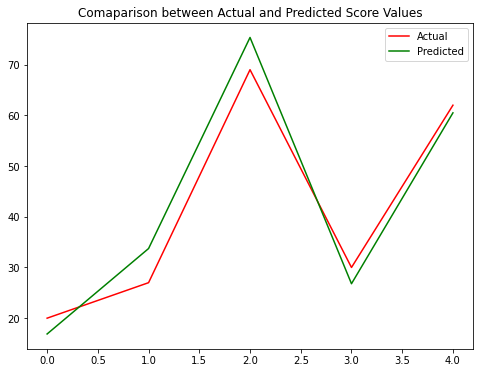

In [47]:
# Line Graph
data.plot(kind='line', figsize=(8,6), color=['R','G'] ,title ='Comaparison between Actual and Predicted Score Values')
plt.show()

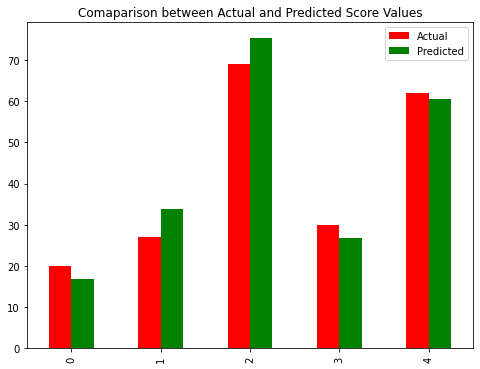

In [48]:
# Bar Graph
data.plot(kind='bar',figsize=(8,6), color=['R', 'G'], title= 'Comaparison between Actual and Predicted Score Values')

#Estimating training and test score

Checking the accuracy of the model

In [49]:
print("Training Score:",regr.score(x_train,y_train))
print("Test Score:",regr.score(x_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


#Predicting values for 9.25 hrs


In [50]:
s_9_25 = regr.predict([[9.25]])
print('Score of student who studied for 9.25 hours a day : ', s_9_25)

Score of student who studied for 9.25 hours a day :  [93.69173249]


#Evaluating the model

Here different errors have been calculated to compare the model performance and predict the accuracy.

In [51]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Mean Absolute Error(mae)
mae = (mean_absolute_error(y_test, y_pred))
print('Mean Absolute Error : ',mae)

# Mean Squared Error(mse)
mse = (mean_squared_error(y_test, y_pred))
print('Mean Squared Error : ',mse)

# Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error : ',rmse)

# Coefficient of determination
r_sq =  r2_score(y_test, y_pred)
print('R-Square : ',r_sq)

Mean Absolute Error :  4.183859899002982
Mean Squared Error :  21.598769307217456
Root Mean Squared Error :  4.647447612100373
R-Square :  0.9454906892105354


###The accuracy of the model is 94.55%.


